In [1]:
import zipfile
import pandas as pd
import os

In [8]:
data_dir = './itineraries_csv/'
merged_df = []

In [9]:
def read_df(zip_file):
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        csv_file = [f for f in zip_ref.namelist() if f.endswith('.csv')][0]
        with zip_ref.open(csv_file) as file:
            df = pd.read_csv(file)
            merged_df.append(df)

In [10]:
for airport_code in os.listdir(data_dir):
    airport_folder = os.path.join(data_dir, airport_code)
    if os.path.isdir(airport_folder):
        for zip_file in os.listdir(airport_folder):
            if zip_file.endswith('.zip'):
                zip_path = os.path.join(airport_folder, zip_file)
                read_df(zip_path)

In [11]:
combined_df = pd.concat(merged_df, ignore_index=True)

In [12]:
combined_df.shape    #13.5M

(13519999, 23)

In [13]:
combined_df.sample(10)

,legId,searchDate,flightDate,startingAirport,destinationAirport,travelDuration,isBasicEconomy,isRefundable,isNonStop,totalFare,...,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode
514292,e0322f5de4f892031bde8a4c0de1a6ae,2022-05-03,2022-05-29,ATL,LAX,PT9H30M,False,False,False,491.60,...,1653836340||1653861900,2022-05-29T09:59:00.000-05:00||2022-05-29T15:0...,AUS||LAX,ATL||AUS,Delta||Delta,DL||DL,Airbus A320||Airbus A320,8640||12000,811||1236,coach||coach
12918836,acdfa3b2204306ed78414e41546a80eb,2022-04-28,2022-05-10,SFO,EWR,PT8H41M,False,False,False,282.60,...,1652219940||1652237040,2022-05-10T16:59:00.000-05:00||2022-05-10T22:4...,IAH||EWR,SFO||IAH,United||United,UA||UA,Boeing 737-900||Boeing 737-900,14160||13140,1641||1419,coach||coach
12047318,ddadf29ac158bf3d799a50dc5d923216,2022-04-26,2022-05-16,PHL,LAX,PT8H39M,False,False,False,641.61,...,1652709000||1652726700,2022-05-16T08:50:00.000-05:00||2022-05-16T11:4...,IAH||LAX,PHL||IAH,United||United,UA||UA,Airbus A320||Boeing 757-300,13440||13260,1329||1383,coach||coach
3491518,e66b231c57872b8fda41f8bf3710d8f5,2022-04-16,2022-04-22,DFW,EWR,PT3H25M,False,False,True,298.60,...,1650684480,2022-04-22T23:28:00.000-04:00,EWR,DFW,JetBlue Airways,B6,Airbus A321,12300,1380,coach
12411551,c209a3bcd61950c9294e6e26fe845dec,2022-05-08,2022-06-28,PHL,ATL,PT5H16M,False,False,False,211.60,...,1656431100||1656446280,2022-06-28T11:45:00.000-04:00||2022-06-28T15:5...,DCA||ATL,PHL||DCA,American Airlines||American Airlines,AA||AA,Embraer 175||Embraer 175,3780||7380,127||541,coach||coach
11815395,142ab52818c82f9afa93041f715ce84d,2022-04-17,2022-06-03,PHL,EWR,PT7H1M,False,False,False,395.10,...,1654291260||1654310160,2022-06-03T17:21:00.000-04:00||2022-06-03T22:3...,CLT||EWR,PHL||CLT,American Airlines||American Airlines,AA||AA,Airbus A321||Airbus A321,6360||6720,449||545,coach||coach
11682871,153283a0300c3b560842e130e7345939,2022-05-12,2022-06-19,ORD,IAD,PT1H58M,False,False,True,518.60,...,1655687700,2022-06-19T21:15:00.000-04:00,IAD,ORD,United,UA,Boeing 737-900,7080,594,coach
4364985,669d2cb011888964b0f446cb9ad79093,2022-05-18,2022-06-28,DFW,ORD,PT2H25M,False,False,True,259.60,...,1656438000,2022-06-28T12:40:00.000-05:00,ORD,DFW,American Airlines,AA,Boeing 737-800,8700,799,coach
5702160,b890c7b7ec1fadafa5d3af6388c55c11,2022-05-09,2022-06-01,EWR,ORD,PT11H1M,False,False,False,231.19,...,1654139400||1654174080,2022-06-01T23:10:00.000-04:00||2022-06-02T07:4...,BUF||ORD,EWR||BUF,United||United,UA||UA,Boeing 737-700||Airbus A320,4980||6360,283||470,coach||coach
13013478,fb34ad2e50e5d4030750298e5555c2c5,2022-04-30,2022-06-13,SFO,OAK,PT7H16M,False,False,False,451.60,...,1655170380||1655189580,2022-06-13T19:33:00.000-06:00||2022-06-13T23:5...,SLC||OAK,SFO||SLC,United||Delta,UA||DL,Boeing 737-900||Airbus A319,6960||6840,599||588,coach||coach


In [14]:
combined_df["startingAirport"].value_counts()

LAX    1352275
LGA    1021938
BOS     989175
SFO     949046
DFW     896596
ORD     894646
MIA     875288
ATL     874069
CLT     854536
PHL     785039
DEN     770429
DTW     747751
EWR     699628
JFK     688263
IAD     594215
OAK     527105
Name: startingAirport, dtype: int64

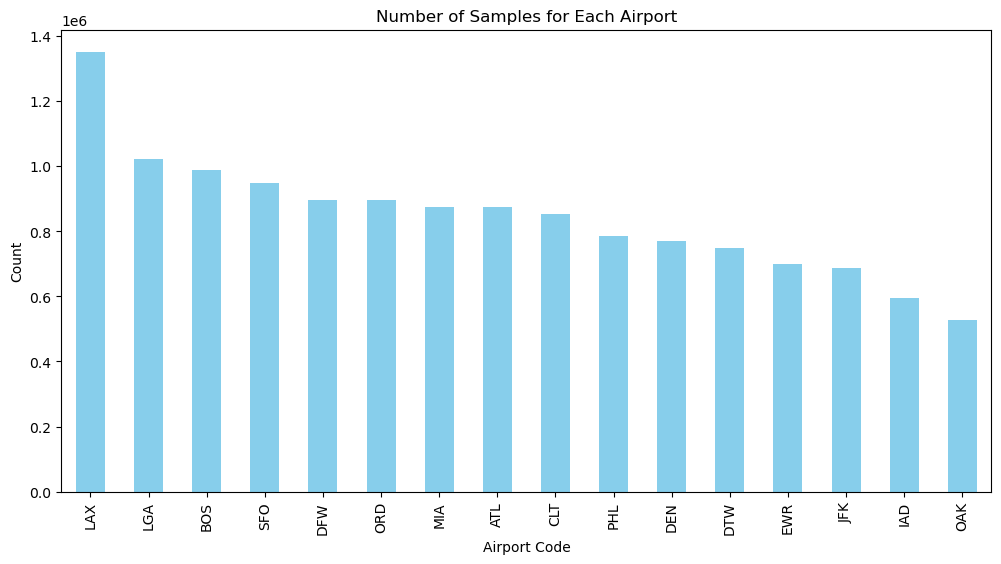

In [16]:
import matplotlib.pyplot as plt

airport_counts = combined_df["startingAirport"].value_counts()

plt.figure(figsize=(12, 6)) 
airport_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Samples for Each Airport')
plt.xlabel('Airport Code')
plt.ylabel('Count')

plt.show()

### Save data in feather format

In [18]:
!pip install feather-format

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for feather-format: filename=feather_format-0.4.1-py3-none-any.whl size=2458 sha256=6dbf588e9bcc6a048fc8bbf8e9171d6b4e8e189280960aaa87d73a0f6e6ebed5
  Stored in directory: c:\users\neelesh kumar\appdata\local\pip\cache\wheels\77\5b\0e\0e63d10b6353208a085a321ea2eed2578f220a77bb8a4bd7ab
Successfully built feather-format


In [19]:
import feather

output_feather_file = 'merged_df.feather'

feather.write_dataframe(combined_df, output_feather_file)

In [20]:
combined_df.to_pickle('merged_data.pkl.gz', compression='gzip')